# Analysis

Before starting anything, let's take a quick look at our data and determine some boundaries to validate our dataset.

## Rules (to start with)

- **Age (days,int):** range 10 - 110
- **Height (cm,int):** range 60 - 230  
- **Weight (kg, int):** range 30 - 250
- **Gender:** -> to bool
- **BMI** -> range 

**Ap High:**
- Low (Hypotension): Less than 90 mm Hg systolic
- Normal: Less than 120 mm Hg systolic
- Elevated: 120-129 mm Hg systolic
- High (Hypertension):
    - Stage 1: 130-139 mm Hg systolic
    - Stage 2: 140 mm Hg or higher systolic
- Critical: 180 mm Hg and above

**Ap Low:**
- Low: Less than 60mm Hg diastolic
- Normal: Less than 80 mm Hg diastolic
- Elevated: 80-89 mm Hg diastolic
- High (Hypertension):
    - Stage 1: 90-99 mm Hg diastolic
    - Stage 2: 100 mm Hg or higher diastolic
- Critical (Made that one up): 120 mm Hg diastolic

## Let's start with those and validate our data to be applicable to real people
- In scripts, you can find the first change we made, booleans are now as booleans


In [6]:
from scripts.generic_methods import load_dataset, drop_by_filter
from scripts.patient import Patient
from icecream import ic

In [7]:
from pathlib import Path


_CARDIO_DATASET_PATH = Path("../data/object_compatible/cardio_train.csv")
CARDIO_DATASET = load_dataset(_CARDIO_DATASET_PATH)

In [8]:
CARDIO_DATASET.head()
CARDIO_DATASET.info()
CARDIO_DATASET.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  bool   
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  bool   
 10  alco         70000 non-null  bool   
 11  active       70000 non-null  bool   
 12  cardio       70000 non-null  bool   
dtypes: bool(5), float64(1), int64(7)
memory usage: 4.6 MB


,id,age,height,weight,ap_hi,ap_lo,cholesterol,gluc
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457
std,28851.302323,2467.251667,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270
min,0.000000,10798.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000
25%,25006.750000,17664.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000
50%,50001.500000,19703.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000
75%,74889.250000,21327.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000
max,99999.000000,23713.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000


Let's take a peak at values we outlied in our set

In [9]:
def patient_is_valid(patient: Patient) -> bool:
    """Check if a patient is valid."""
    return patient.is_valid

In [10]:
# VALID_DATASET = drop_by_filter(CARDIO_DATASET, lambda p: not patient_is_valid(p))
# VALID_DATASET.to_csv("../data/filtered/cardio_train.csv", index=False)
# VALID_DATASET.head()
# VALID_DATASET.info()
# VALID_DATASET.describe()

In [11]:
# UNVALID_DATASET = drop_by_filter(CARDIO_DATASET, patient_is_valid)
# UNVALID_DATASET.to_csv("../data/filtered/cardio_train_unvalid.csv", index=False)
# UNVALID_DATASET.head()
# UNVALID_DATASET.info()
# UNVALID_DATASET.describe()


Let's take a quick look at distrubution
- Gender
- Chloresterol
- Glucose Lvl
- Ap Low
- Ap High
- BMI 

In [12]:
import pandas as pd

def check_missing_values(df):
    """
    Check for missing values in a pandas DataFrame.
    
    Parameters:
        df (pandas.DataFrame): The DataFrame to check for missing values.
        
    Returns:
        missing_values (pandas.DataFrame): A DataFrame showing the count and percentage of missing values 
                                           for each column in the input DataFrame.
    """
    missing_counts = df.isnull().sum()
    missing_percentage = (missing_counts / len(df)) * 100
    missing_values = pd.DataFrame({
        'Missing Values': missing_counts,
        'Percentage': missing_percentage
    })
    return missing_values

# Example usage:

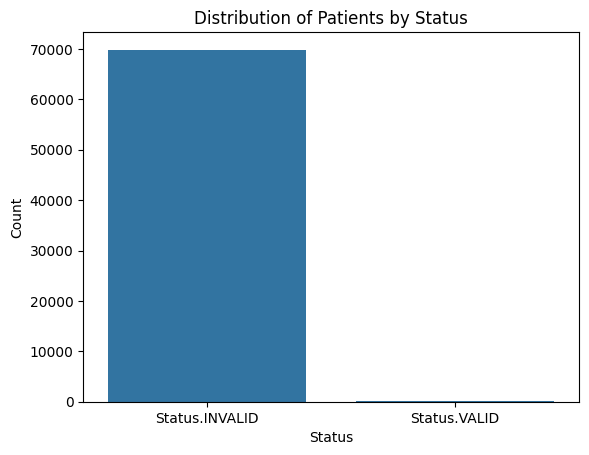

In [15]:
from scripts.plots import plot_patients_by_status, Status

plot_patients_by_status(CARDIO_DATASET, lambda patient: Status.VALID if patient.bmi_is_valid else Status.INVALID)